In [55]:
import numpy as np
import pandas as pd

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
df = pd.read_csv("College_Data", index_col=0)

In [58]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [60]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [61]:
df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

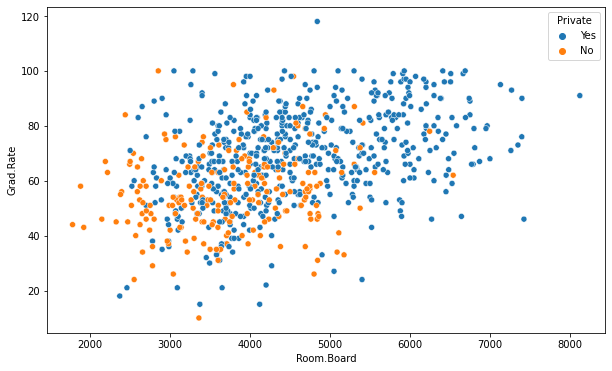

In [62]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df, x="Room.Board", y="Grad.Rate", hue="Private")

<Figure size 720x432 with 0 Axes>

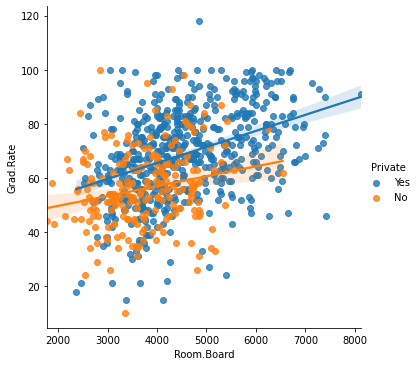

In [63]:
plt.figure(figsize=(10,6))

sns.lmplot(x="Room.Board", y="Grad.Rate", data=df, hue="Private")

<Figure size 720x432 with 0 Axes>

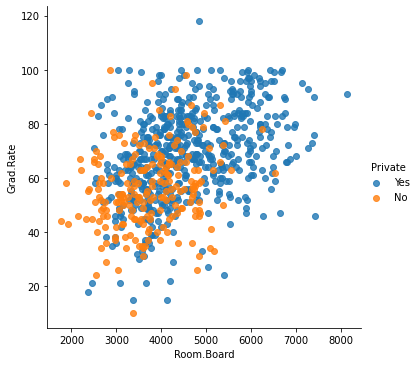

In [64]:
plt.figure(figsize=(10,6))

sns.lmplot(x="Room.Board", y="Grad.Rate", data=df, hue="Private", fit_reg=False)

<Figure size 720x432 with 0 Axes>

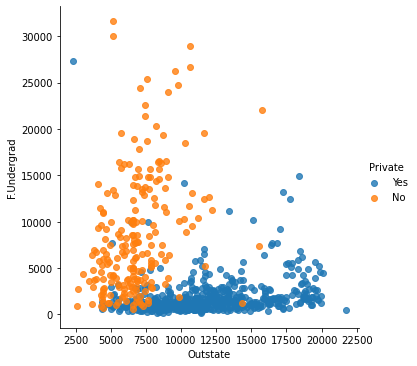

In [65]:
plt.figure(figsize=(10,6))

sns.lmplot(x="Outstate", y="F.Undergrad", data=df, hue="Private", 
           fit_reg=False)

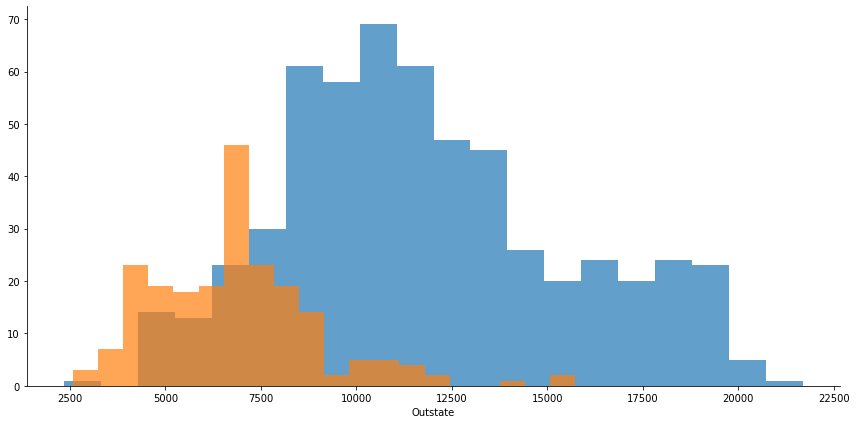

In [66]:
g = sns.FacetGrid(df, hue="Private", height=6, aspect=2)
g = g.map(plt.hist, "Outstate", bins=20, alpha=0.7)

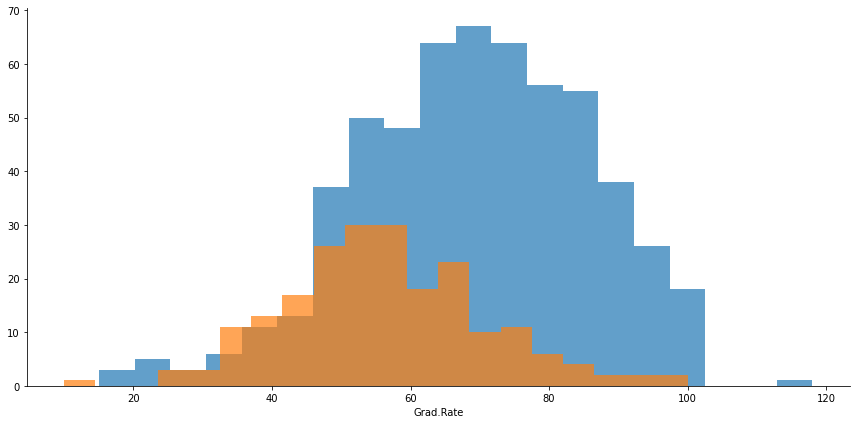

In [67]:
g = sns.FacetGrid(df, hue="Private", height=6, aspect=2)
g = g.map(plt.hist, "Grad.Rate", bins=20, alpha=0.7)

In [68]:
df[df["Grad.Rate"] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [69]:
df["Grad.Rate"]["Cazenovia College"] = 100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
df[df["Grad.Rate"] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


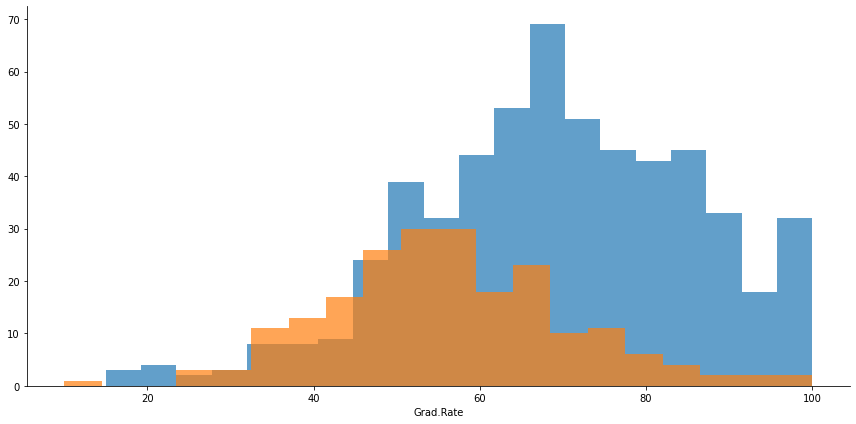

In [71]:
g = sns.FacetGrid(df, hue="Private", height=6, aspect=2)
g = g.map(plt.hist, "Grad.Rate", bins=20, alpha=0.7)

In [72]:
from sklearn.cluster import KMeans

In [102]:
km = KMeans(n_clusters=6)

In [103]:
km.fit(df.drop("Private", axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [104]:
km.cluster_centers_

array([[1.27472500e+03, 9.17008333e+02, 4.13125000e+02, 1.85125000e+01,
        4.51541667e+01, 1.89484583e+03, 6.02275000e+02, 7.11685417e+03,
        3.65121250e+03, 5.34095833e+02, 1.40639583e+03, 6.29333333e+01,
        7.00291667e+01, 1.57025000e+01, 1.71375000e+01, 6.49705833e+03,
        5.67125000e+01, 6.54166667e-01],
       [2.87977064e+03, 1.78230275e+03, 5.42045872e+02, 4.54954128e+01,
        7.49357798e+01, 2.11827523e+03, 2.03522936e+02, 1.67597339e+04,
        5.33963303e+03, 5.76715596e+02, 1.00166055e+03, 8.64770642e+01,
        9.27247706e+01, 1.08165138e+01, 3.51467890e+01, 1.52238257e+04,
        7.88532110e+01, 9.90825688e-01],
       [6.36424528e+03, 4.43168868e+03, 1.88269811e+03, 2.20849057e+01,
        5.35566038e+01, 9.93973585e+03, 2.48368868e+03, 7.25048113e+03,
        3.83215094e+03, 5.68915094e+02, 1.81408491e+03, 7.97547170e+01,
        8.56792453e+01, 1.70905660e+01, 1.42169811e+01, 7.66513208e+03,
        5.61226415e+01, 8.49056604e-02],
       [1.431

In [105]:
def convert_college(x):
  if x == "Yes":
    return 1
  else:
    return 0

df["Cluster"] = df["Private"].apply(lambda x: convert_college(x))

In [106]:
df["Cluster"]

Abilene Christian University      1
Adelphi University                1
Adrian College                    1
Agnes Scott College               1
Alaska Pacific University         1
                                 ..
Worcester State College           0
Xavier University                 1
Xavier University of Louisiana    1
Yale University                   1
York College of Pennsylvania      1
Name: Cluster, Length: 777, dtype: int64

In [107]:
from sklearn.metrics import confusion_matrix, classification_report

In [108]:
print(confusion_matrix(df["Cluster"], km.labels_))
print()
print(classification_report(df["Cluster"], km.labels_))

[[ 83   1  97   5   0  26]
 [157 108   9 268  18   5]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   0   0   0   0]]

              precision    recall  f1-score   support

           0       0.35      0.39      0.37       212
           1       0.99      0.19      0.32       565
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.25       777
   macro avg       0.22      0.10      0.11       777
weighted avg       0.81      0.25      0.33       777



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
